# LAboratory work 6

In [78]:
import numpy as np
import matplotlib.pyplot as plt

## Task 1

### Task 1.1

Згенеруйте двовимірні дані (x, y) за допомогою numpy.random : бажано, щоб розподіл
точок був навколо деякої наперед заданої прямої (y = kx + b) для подальшого аналізу
результатів.

noise simulates the variability present in real-world data

In [79]:
def data(slope, intercept, point, noise):
    x = np.random.rand(point) * 10 
    noise_r = np.random.normal(0, noise, x.shape)
    y = slope * x + intercept + noise_r
    return x, y


Draw random samples from a normal (Gaussian) distribution
$$
p(x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x - \mu)^2}{2\sigma^2}},
$$


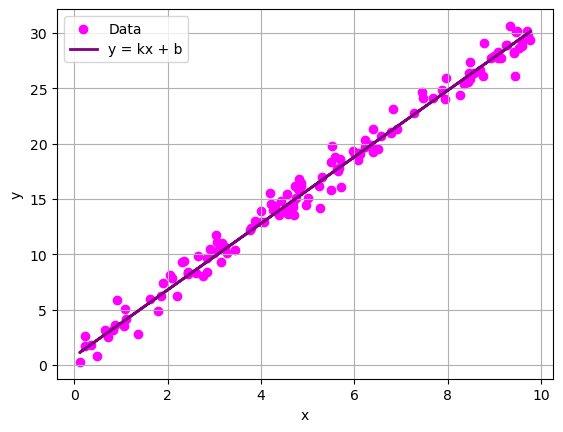

In [80]:
slope = 3
intercept = 0.8
point =123
level_noise = 1

x, y = data(3, 0.8, 135, 1)

plt.scatter(x, y, label='Data', color = 'fuchsia')
plt.plot(x, slope * x + intercept, color = 'purple', label='y = kx + b', linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()


In [81]:
for xi, yi in zip(x, y):
    print(f"({xi:.2f}, {yi:.2f})")

(9.14, 27.70)
(9.34, 30.63)
(2.30, 9.29)
(3.11, 10.48)
(7.96, 25.93)
(4.42, 14.82)
(9.71, 30.19)
(0.35, 1.81)
(3.00, 10.12)
(6.01, 18.99)
(4.22, 14.55)
(5.97, 19.33)
(1.36, 2.85)
(6.23, 20.33)
(2.09, 7.90)
(3.77, 12.22)
(6.78, 20.93)
(4.82, 16.83)
(5.27, 14.15)
(9.26, 28.95)
(8.79, 29.11)
(5.69, 18.64)
(4.58, 13.66)
(0.90, 5.91)
(1.62, 6.00)
(3.43, 10.36)
(4.72, 16.16)
(6.23, 19.72)
(9.41, 28.15)
(9.68, 29.50)
(2.90, 10.49)
(4.86, 16.47)
(8.26, 24.36)
(5.67, 17.78)
(4.29, 14.37)
(3.78, 12.36)
(9.08, 27.70)
(4.25, 13.96)
(5.65, 17.49)
(0.72, 2.52)
(6.92, 21.32)
(9.60, 29.17)
(1.06, 3.49)
(2.20, 6.22)
(5.49, 18.33)
(1.86, 6.24)
(8.43, 25.61)
(9.43, 26.15)
(4.62, 14.38)
(2.83, 8.40)
(3.16, 10.99)
(5.01, 15.12)
(9.54, 28.67)
(2.04, 8.12)
(1.80, 4.91)
(8.35, 25.36)
(4.79, 15.91)
(2.66, 9.83)
(4.53, 13.96)
(6.82, 23.16)
(6.40, 21.33)
(5.49, 15.85)
(4.20, 15.52)
(8.94, 27.76)
(5.53, 19.83)
(3.15, 9.31)
(4.76, 15.12)
(0.23, 1.73)
(2.35, 9.38)
(6.40, 19.50)
(4.40, 13.59)
(0.22, 2.62)
(7.69, 24.

### Task 1.2

Напишіть функцію, яка реалізує метод найменших квадратів для пошуку оптимальних
оцінок k та b.

m = (n∑xy - ∑y∑x)/[n∑x2 - (∑x)2]

 
b = (∑y - m∑x)/n

The regression slope intercept formula, b0 = y – b1 * x is really just an algebraic variation of the regression equation, y' = b0 + b1x where “b0” is the y-intercept and b1x is the slope.



$$
m = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sum (x_i - \bar{x})^2}
$$


In [82]:
def mean_val(x,y):
    
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    k_opt = np.sum((x - mean_x) * (y - mean_y)) / np.sum(np.power(x - mean_x, 2))
    b_opt = mean_y - k_opt * mean_x
    return k_opt, b_opt


In [83]:
k_opt, b_opt = mean_val(x,y)
print(k_opt, b_opt)

2.9658153472040936 1.09430784284144


### Task 1.3

Порівняйте знайдені параметри з оцінкою np.polyfit(x,y,1) (оцінка полінома
степеню 1 методом найменших квадратів), та з початковими параметрами прямої (якщо
такі є).

Fit a polynomial p(x) = p[0] * x**deg + ... + p[deg] of degree deg to points (x, y). Returns a vector of coefficients p that minimises the squared error in the order deg, deg-1, … 0.

deg
int
Degree of the fitting polynomial

In [84]:
polynomial_k, polynomial_b = np.polyfit(x, y, 1)
print(polynomial_k, polynomial_b)

2.965815347204094 1.0943078428414406


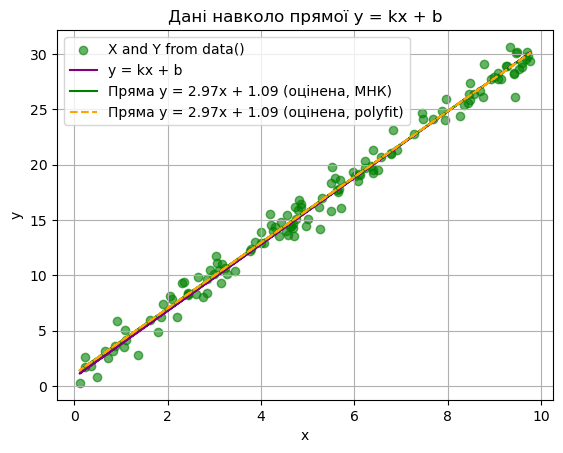

In [85]:
initial_k = 2  
initial_b = 1 

plt.scatter(x, y, label="X and Y from data()", color="green", alpha=0.6)

plt.plot(x, slope * x + intercept, label="y = kx + b", color="purple")

plt.plot(x, k_opt * x + b_opt, label=f"Пряма y = {k_opt:.2f}x + {b_opt:.2f} (оцінена, МНК)", color="green")

plt.plot(x, polynomial_k * x + polynomial_b, label=f"Пряма y = {polynomial_k:.2f}x + {polynomial_b:.2f} (оцінена, polyfit)", color="orange", linestyle="--")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Дані навколо прямої y = kx + b")
plt.legend()
plt.grid()
plt.show()



### g

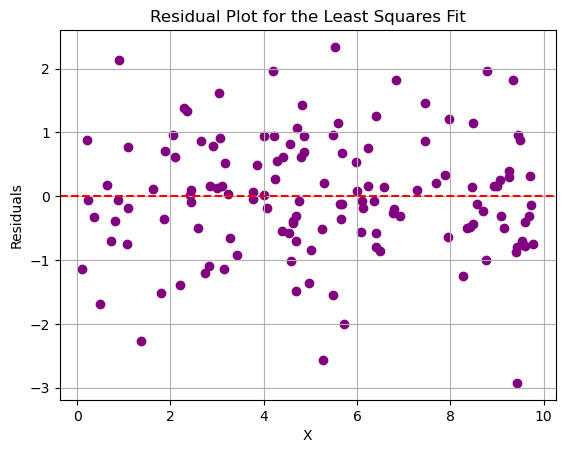

In [86]:

residuals = y - (k_opt * x + b_opt)  
plt.scatter(x, residuals, color='purple')
plt.axhline(0, color='red', linestyle='--')  
plt.xlabel("X")
plt.ylabel("Residuals")
plt.title("Residualt")
plt.grid()
plt.show()

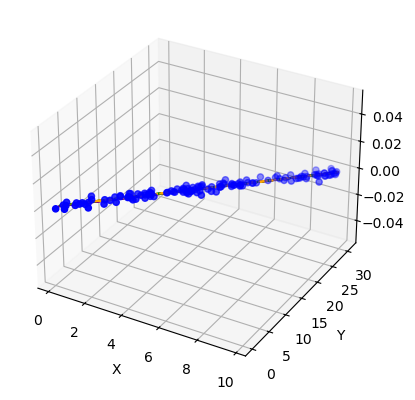

In [87]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, color='blue')
ax.plot(x, slope * x + intercept, label="y = kx + b", color="purple")
ax.plot(x, k_opt * x + b_opt, label=f"Пряма y = {k_opt:.2f}x + {b_opt:.2f} (оцінена, МНК)", color="green")

ax.plot(x, polynomial_k * x + polynomial_b, label=f"Пряма y = {polynomial_k:.2f}x + {polynomial_b:.2f} (оцінена, polyfit)", color="orange", linestyle="--")

ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()

## Task 2

Напишіть функцію, яка реалізує метод градієнтного спуску для пошуку оптимальних
оцінок k та b. Визначіть оптимальні вхідні параметри: learning_rate, n_iter